<a href="https://colab.research.google.com/github/Balajivenkatesh05/Medical-Insurance-cost-prediction/blob/main/Medical_insurance_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Required Libraries

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn import metrics

# Loading data and data cleaning

In [10]:
data = pd.read_csv("insurance.csv")

In [11]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [12]:
data.shape

(1338, 7)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [14]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
data.duplicated().sum()

1

In [18]:
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# EDA

In [15]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-20-65e466ff48fb>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


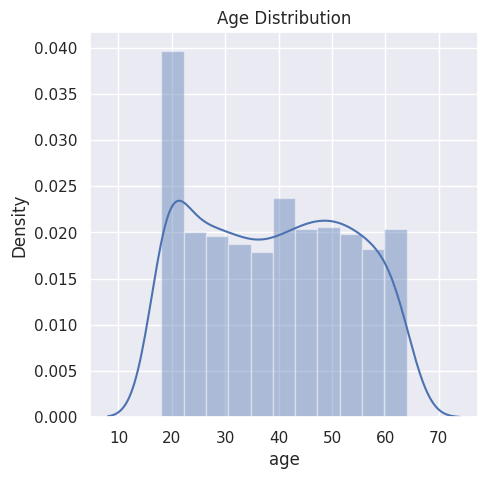

In [20]:
# distribution of age value
sns.set()
plt.figure(figsize=(5,5))
sns.distplot(data['age'])
plt.title('Age Distribution')
plt.show()

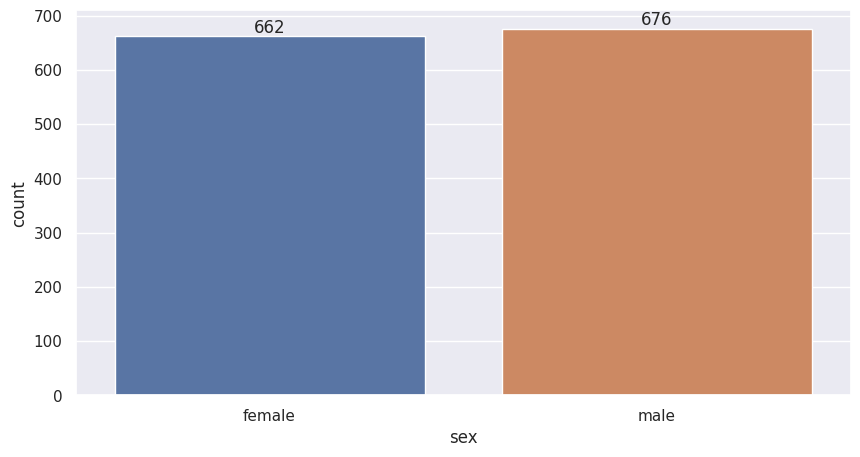

In [23]:
# Gender column
plt.figure(figsize=(10,5))
ax = sns.countplot(x='sex', data=data)
for i in ax.containers:
  ax.bar_label(i)

<ipython-input-24-b2fd3933e6de>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['bmi'])


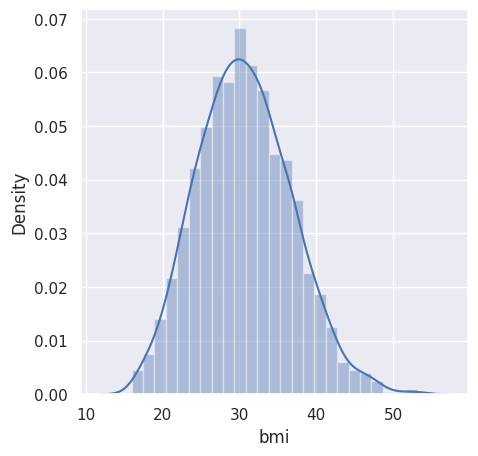

In [24]:
# distribution of bmi
plt.figure(figsize=(5,5))
sns.distplot(data['bmi'])
plt.show()

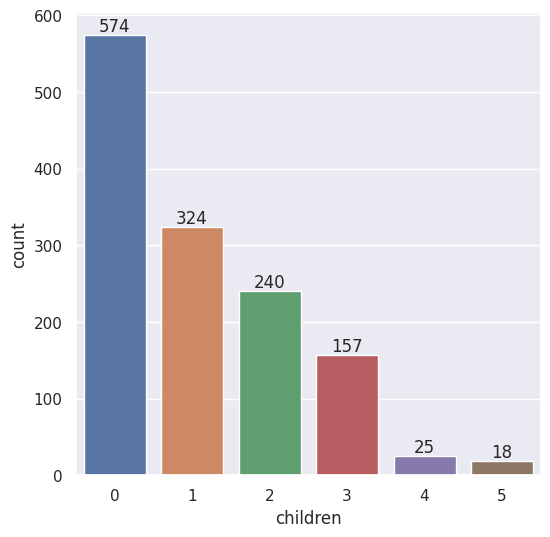

In [26]:
# children column
plt.figure(figsize=(6,6))
ax = sns.countplot(x='children', data=data)
for i in ax.containers:
  ax.bar_label(i)

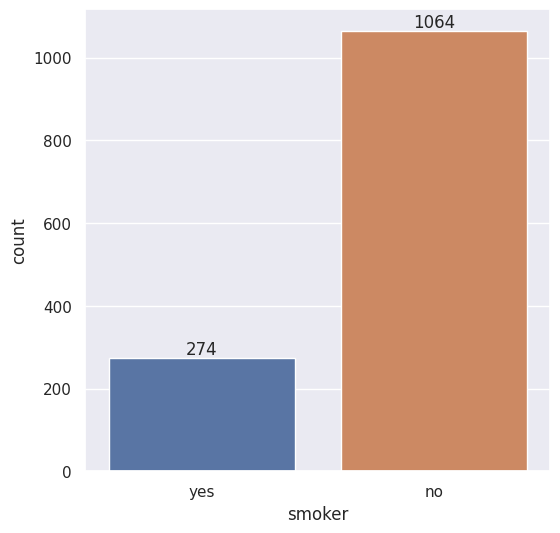

In [27]:
# smoker column
plt.figure(figsize=(6,6))
ax = sns.countplot(x='smoker', data=data)
for i in ax.containers:
  ax.bar_label(i)

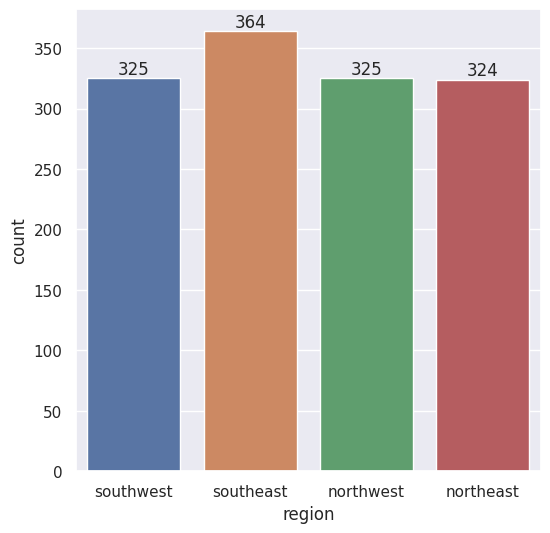

In [28]:
# region column
plt.figure(figsize=(6,6))
ax = sns.countplot(x='region', data=data)
for i in ax.containers:
  ax.bar_label(i)

<ipython-input-29-d398d3dc7ece>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['charges'])


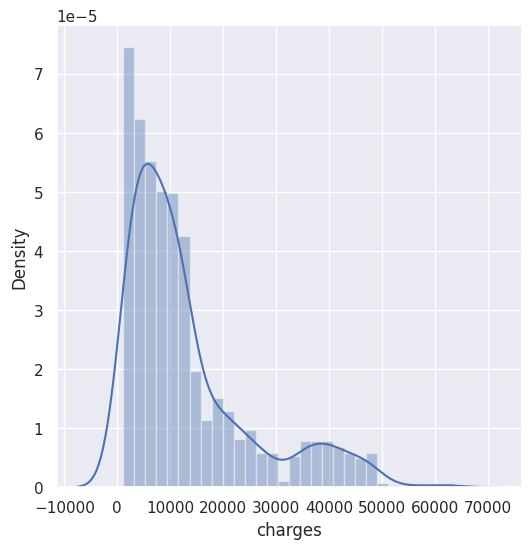

In [29]:
# distribution of charges value
plt.figure(figsize=(6,6))
sns.distplot(data['charges'])
plt.show()

In [68]:
corr = data.corr()

<Axes: >

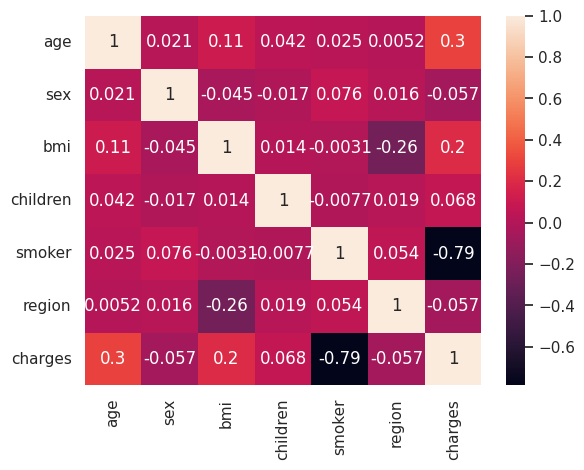

In [67]:
sns.heatmap(data=corr, annot=True)

# Encoding

In [40]:
data.sex = data.sex.map({'male':0, 'female':1})
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,yes,southwest,16884.9240
1,18,0,33.77,1,no,southeast,1725.5523
2,28,0,33.00,3,no,southeast,4449.4620


In [41]:
data.smoker = data.smoker.map({'yes':0, 'no':1})
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,0,southwest,16884.9240
1,18,0,33.77,1,1,southeast,1725.5523
2,28,0,33.00,3,1,southeast,4449.4620


In [44]:
data.region = data.region.map({'southeast':0,'southwest':1,'northeast':2,'northwest':3})
data.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.90,0,0,1,16884.9240
1,18,0,33.77,1,1,0,1725.5523
2,28,0,33.00,3,1,0,4449.4620


# Splitting

In [50]:
x = data[['age','sex','bmi','children','smoker','region']].values
y = data['charges'].values

In [53]:
print(x)

[[19.    1.   27.9   0.    0.    1.  ]
 [18.    0.   33.77  1.    1.    0.  ]
 [28.    0.   33.    3.    1.    0.  ]
 ...
 [18.    1.   36.85  0.    1.    0.  ]
 [21.    1.   25.8   0.    1.    1.  ]
 [61.    1.   29.07  0.    0.    3.  ]]


In [54]:
print(y)

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(x.shape, x_train.shape, x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# Model - Linear Regression

In [56]:
regressor = LinearRegression()

In [57]:
model = regressor.fit(x_train, y_train)

In [58]:
# prediction on training data
training_data_prediction =regressor.predict(x_train)

In [59]:
# R squared value for training data
r2_train = metrics.r2_score(y_train, training_data_prediction)
print('R squared vale : ', r2_train)

R squared vale :  0.751415568593292


In [60]:
# prediction on test data
test_data_prediction =regressor.predict(x_test)

In [61]:
# R squared value for test data
r2_test = metrics.r2_score(y_test, test_data_prediction)
print('R squared vale : ', r2_test)

R squared vale :  0.7454981631715853


# Building a Predictive system - Linear Regression

In [62]:
input_data = [31,1,25.74,0,1,0]

# changing input_data to a numpy array
input_data_as_numpy_array = np.array(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3759.78351352]
The insurance cost is USD  3759.783513520011


# Model - XGBoost Regression

In [70]:
# loading the model
model01 = XGBRegressor()

In [72]:
# training the model with X_train
model01.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [74]:
# accuracy for prediction on training data
training_data_predictionxgb = model01.predict(x_train)

In [75]:
print(training_data_predictionxgb)

[ 2257.9128  6075.4214 11472.53   ... 12623.879  10390.589  12211.763 ]


In [77]:
# R2 score for training data
score_1 = metrics.r2_score(y_train, training_data_predictionxgb)
print("R squared error : ", score_1)

R squared error :  0.996450050641927


In [81]:
# accuracy for prediction on test data
test_data_predictionxgb = model01.predict(x_test)

In [83]:
# R2 score for prediction on test data
score_t = metrics.r2_score(y_test, test_data_predictionxgb)
print("R squared error : ", score_t)


R squared error :  0.8194298345607486


# Building a Predictive system - XGB Regressor

In [85]:
input_data = [31,1,25.74,0,1,0]

# changing input_data to a numpy array
input_data_as_numpy_array = np.array(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

predictionxgb = model01.predict(input_data_reshaped)
print(predictionxgb)

print('The insurance cost is USD ', prediction[0])

[3243.9182]
The insurance cost is USD  3243.9182
